In [1]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.utils import to_categorical

# Importing Dataset
- File is saved to Google drive and imported from there.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import zipfile
import os

from PIL import Image
import IPython.display as display

import numpy as np

In [4]:
zip_file_path = '/content/gdrive/My Drive/cat_and_rabbit_folder.zip'

extracted_folder_path = '/content/data'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

extracted_files = os.listdir(extracted_folder_path)

### Training Dataset
Creating the training dataset

In [5]:
data_folder = '/content/data/train-cat-rabbit/'

categories = os.listdir(data_folder)

train_images = {category: [] for category in categories}

In [6]:
#Load images into dictionary
for category in categories:
    category_folder = os.path.join(data_folder, category)
    image_files = [os.path.join(category_folder, img) for img in os.listdir(category_folder) if img.endswith('.jpg')]
    train_images[category] = image_files


### Testing Dataset
Creating the testing dataset

In [7]:
data_folder = '/content/data/val-cat-rabbit/'

categories = os.listdir(data_folder)

test_images = {category: [] for category in categories}

In [8]:
#Load images into dictionary
for category in categories:
    category_folder = os.path.join(data_folder, category)
    image_files = [os.path.join(category_folder, img) for img in os.listdir(category_folder) if img.endswith('.jpg')]
    test_images[category] = image_files

### Processing the dataset into a pandas dataframe

In [9]:
cat_train = []
rabbit_train = []

cat_test = []
rabbit_test = []

#Creating training dataframe
for key, value in train_images.items():
    if key == 'cat':
        cat_train.append(value)
    else:
        rabbit_train.append(value)

#Creating testing dataframe
for key, value in test_images.items():
      if key == 'cat':
        cat_test.append(value)
    else:
        rabbit_test.append(value)


In [10]:
#processing. These are 300 x 300 images
cat_train_value = []
rabbit_train_value = []

cat_test_value = []
rabbit_test_value = []

for n in cat_train:
      for i in n:
        cat_train_value.append(i)

for n in rabbit_train:
      for i in n:
        rabbit_train_value.append(i)

for n in cat_test:
    for i in n:
        cat_test_value.append(i)

for n in rabbit_test:
    for i in n:
        rabbit_test_value.append(i)

In [11]:
#Resizing image due to processing capabilities
cat_train_resize = []
rabbit_train_resize = []

cat_test_resize = []
rabbit_test_resize = []

for image in tqdm(cat_train_value, desc='Resizing Images'):
    resize = Image.open(image).resize((50, 50))
    cat_train_resize.append(resize)

for image in tqdm(rabbit_train_value, desc='Resizing Images'):
    resize = Image.open(image).resize((50, 50))
    rabbit_train_resize.append(resize)

for image in tqdm(cat_test_value, desc='Resizing Images'):
    resize = Image.open(image).resize((50, 50))
    cat_test_resize.append(resize)

for image in tqdm(rabbit_test_value, desc='Resizing Images'):
    resize = Image.open(image).resize((50, 50))
    rabbit_test_resize.append(resize)

Resizing Images: 100%|██████████| 207/207 [00:00<00:00, 498.55it/s]


In [12]:
print("Number of cat training data: ", len(cat_train_resize))
print("Number of rabbit training data: ", len(rabbit_train_resize))

print("Number of cat testing data: ", len(cat_test_resize))
print("Number of rabbit testing data: ", len(rabbit_test_resize))

#Creating labels
cat_train_df = pd.DataFrame(cat_train_resize, columns = ['Image'])
rabbit_train_df = pd.DataFrame(rabbit_train_resize, columns = ['Image'])

cat_test_df = pd.DataFrame(cat_test_resize, columns = ['Image'])
rabbit_test_df = pd.DataFrame(rabbit_test_resize, columns = ['Image'])

Number of cat training data:  800
Number of rabbit training data:  800
Number of cat testing data:  207
Number of rabbit testing data:  207


In [13]:
cat_train_df['Label'] = 'cat'
cat_test_df['Label'] = 'cat'

rabbit_train_df['Label'] = 'rabbit'
rabbit_test_df['Label'] = 'rabbit'

In [14]:
#Concatenating the rabbit and cat dataframe on top of each other to create a full dataset

full_train_df = pd.concat([cat_train_df, rabbit_train_df], axis=0)
full_test_df = pd.concat([cat_test_df, rabbit_test_df], axis = 0)

In [15]:
#Converts an image to its vector representation
def obtain_array(image_path):
    return np.array(image_path)

In [16]:
tqdm.pandas(desc='Processing Images') #Track time
full_train_df['array'] = full_train_df['Image'].progress_apply(obtain_array)
full_test_df['array'] = full_test_df['Image'].progress_apply(obtain_array)

Processing Images: 100%|██████████| 414/414 [00:00<00:00, 37300.32it/s]


In [17]:
full_train_df.head()

,Image,Label,array
0,<PIL.Image.Image image mode=RGB size=50x50 at ...,cat,"[[[39, 32, 20], [30, 17, 4], [27, 18, 3], [43,..."
1,<PIL.Image.Image image mode=RGB size=50x50 at ...,cat,"[[[167, 165, 173], [184, 184, 193], [180, 184,..."
2,<PIL.Image.Image image mode=RGB size=50x50 at ...,cat,"[[[50, 65, 65], [42, 55, 53], [43, 56, 59], [5..."
3,<PIL.Image.Image image mode=RGB size=50x50 at ...,cat,"[[[59, 58, 56], [60, 61, 59], [62, 64, 63], [6..."
4,<PIL.Image.Image image mode=RGB size=50x50 at ...,cat,"[[[64, 63, 58], [46, 46, 42], [39, 37, 37], [3..."


In [18]:
full_test_df.head()

,Image,Label,array
0,<PIL.Image.Image image mode=RGB size=50x50 at ...,cat,"[[[193, 166, 165], [176, 157, 168], [163, 151,..."
1,<PIL.Image.Image image mode=RGB size=50x50 at ...,cat,"[[[48, 63, 37], [45, 77, 42], [42, 77, 39], [4..."
2,<PIL.Image.Image image mode=RGB size=50x50 at ...,cat,"[[[136, 134, 113], [137, 135, 114], [139, 136,..."
3,<PIL.Image.Image image mode=RGB size=50x50 at ...,cat,"[[[93, 94, 113], [92, 93, 114], [93, 94, 115],..."
4,<PIL.Image.Image image mode=RGB size=50x50 at ...,cat,"[[[132, 142, 141], [134, 144, 142], [133, 144,..."


#Exploratory Data Analysis conclusion
- The original image is 300 pixels by 300 pixels by 3 Dimensions. RGB. This is resized to 50 pixels by 50 pixels by 3 Dimensions due to the limited computational resources available.
- There are 800 cat images and 800 rabbit images in the training dataset (which will be used to further split into validation set later on)
- There are 207 cat images and 207 rabbit images in the testing dataset (which will be used for performance evaluation)
- Labels are manually provided for cat and rabbit.
- A vector representation is created to prepare the data for CNN

# Show a random sample of 6 cats and rabbits

In [19]:
#I prepared the data where first 800 is cat last 800 is rabbit
cat_rand_list = random.sample(range(0, 801), 6)
print(cat_rand_list)
rabbit_rand_list = random.sample(range(801,1601), 6)
print(rabbit_rand_list)

[305, 435, 376, 36, 249, 429]
[810, 1422, 805, 1523, 1154, 1466]


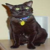

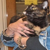

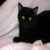

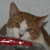

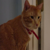

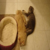

In [20]:
#6 random cats
for i in cat_rand_list:
    image = full_train_df.iloc[i]['Image']
    display.display(image)

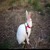

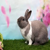

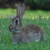

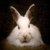

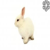

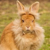

In [21]:
#6 random rabbits
for i in rabbit_rand_list:
    image = full_train_df.iloc[i]['Image']
    display.display(image)

# Data preparation
- x train, y_train
- x test, y test

In [22]:
#Training dataset, splitting will be done during model fitting for validation set
y_train = full_train_df['Label']
x_train = full_train_df.drop(columns = ['Image', 'Label'])

y_test = full_test_df['Label']
x_test = full_test_df.drop(columns = ['Image', 'Label'])

In [23]:
print(y_train.shape)
print(x_train.shape)
print(y_test.shape)
print(x_test.shape)

(1600,)
(1600, 1)
(414,)
(414, 1)


In [24]:
#Converting to higher dimension vector
x_train = x_train['array'].values
x_train = np.stack(x_train, axis=0)

In [25]:
#Converting to vector
x_test = x_test['array'].values
x_test = np.stack(x_test, axis=0)

In [26]:
print(x_train.shape)
print(x_test.shape)

(1600, 50, 50, 3)
(414, 50, 50, 3)


In [27]:
print(y_train[0:5])
print(y_test[0:5])

0    cat
1    cat
2    cat
3    cat
4    cat
Name: Label, dtype: object
0    cat
1    cat
2    cat
3    cat
4    cat
Name: Label, dtype: object


In [28]:
#Encoding all the y values
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [29]:
print(y_train[0:5])
print(y_test[0:5])

[0 0 0 0 0]
[0 0 0 0 0]


1 is rabbit, 0 is cat

In [30]:
#Min-Max Normalization
x_train = x_train/255.0
x_test = x_test/225.0

In [39]:
# Create CNN
model = Sequential()

#Convolutional layer 1
model.add(Conv2D(filters=20, #K
                 kernel_size=(3, 3), #3 by 3 convolutional filter
                 activation='tanh',
                 input_shape=(50,50,3)))
#Pooling 1
model.add(MaxPooling2D())

#Convolutional layer 2
model.add(Conv2D(filters=16,
                 kernel_size=(3, 3),
                 activation='tanh'))
#Pooling 2
model.add(MaxPooling2D())

#Compress vector
model.add(Flatten())

#Dense Layer 1
model.add(Dense(50)) #Because my image is high dimension, lower the number of neurons first
#Activation 1
model.add(Activation('tanh'))

#Dense Layer 2
model.add(Dense(25))
#Activation 2
model.add(Activation('tanh'))

#Final Dense Layer
model.add(Dense(1)) #Binary classification
#Activation 3
model.add(Activation('sigmoid')) #Binary classification

epochs = 20

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #Binary crossentropy
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 48, 20)        560       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 20)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 16)        2896      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 11, 11, 16)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1936)              0         
                                                                 
 dense_3 (Dense)             (None, 50)               

In [40]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('CNN_cat_rabbit_{epoch:02d}.h5')

history = model.fit(x_train, y_train, validation_split=0.18, epochs=epochs, batch_size=128, callbacks =[checkpoint])


Epoch 1/20
11/11 [==============================] - 5s 233ms/step - loss: 0.7380 - accuracy: 0.5800 - val_loss: 1.0835 - val_accuracy: 0.0104
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 4s 378ms/step - loss: 0.5834 - accuracy: 0.7066 - val_loss: 0.8455 - val_accuracy: 0.3924
Epoch 3/20
11/11 [==============================] - 3s 237ms/step - loss: 0.5053 - accuracy: 0.7675 - val_loss: 0.9278 - val_accuracy: 0.4201
Epoch 4/20
11/11 [==============================] - 2s 214ms/step - loss: 0.4768 - accuracy: 0.7752 - val_loss: 0.3869 - val_accuracy: 0.8125
Epoch 5/20
11/11 [==============================] - 2s 218ms/step - loss: 0.4872 - accuracy: 0.7492 - val_loss: 0.3932 - val_accuracy: 0.8438
Epoch 6/20
11/11 [==============================] - 2s 199ms/step - loss: 0.4172 - accuracy: 0.8209 - val_loss: 0.5825 - val_accuracy: 0.6875
Epoch 7/20
11/11 [==============================] - 3s 287ms/step - loss: 0.3729 - accuracy: 0.8575 - val_loss: 0.8808 - val_accuracy: 0.5451
Epoch 8/20
11/11 [==============================] - 4s 327ms/step - loss: 0.3719 - accuracy: 0.8491 - val_loss: 0.7870 - val_accuracy: 0.5556
Epoch 9/20
11/11 

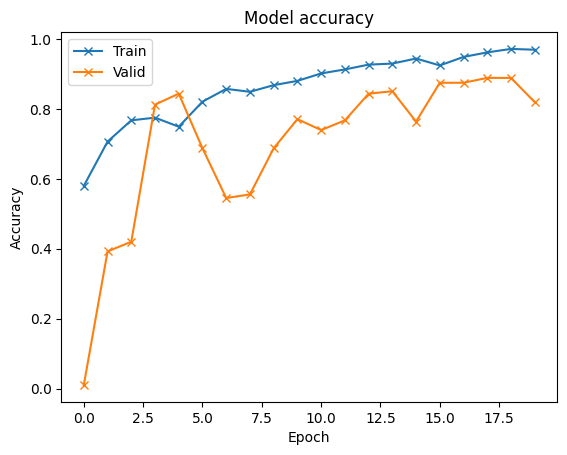

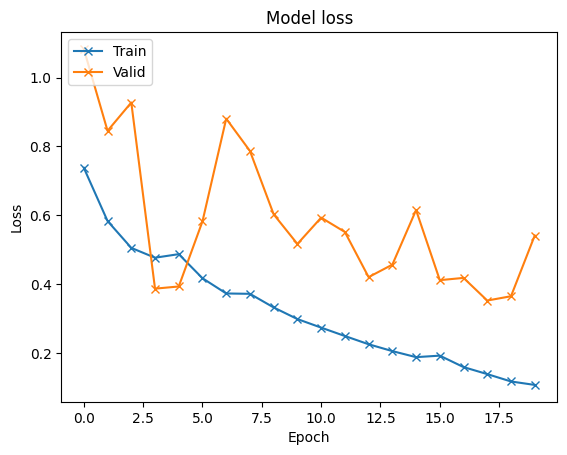

In [41]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'],'x-')
plt.plot(history.history['val_accuracy'],'x-')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'],'x-')
plt.plot(history.history['val_loss'],'x-')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

In [44]:
from google.colab import files
files.download("CNN_cat_rabbit_18.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
#Selecting the model based on training and validation accuracy.
#Despite the first model having a high validation accuracy, it should not be picked due to its really low training accuracy.

model.load_weights("CNN_cat_rabbit_18.h5")
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Loss: %.4f" % (scores[0]))

Accuracy: 77.54%
Loss: 0.5563


### Visualizing the performance

In [45]:
cnn_pred = model.predict(x_test)
cnn_pred = np.round(cnn_pred) #Round to 1/0

13/13 [==============================] - 0s 19ms/step


In [46]:
cnn_pred[:5]

array([[0.],
       [0.],
       [1.],
       [0.],
       [1.]], dtype=float32)

              precision    recall  f1-score   support

           0       0.75      0.82      0.79       207
           1       0.80      0.73      0.76       207

    accuracy                           0.78       414
   macro avg       0.78      0.78      0.77       414
weighted avg       0.78      0.78      0.77       414



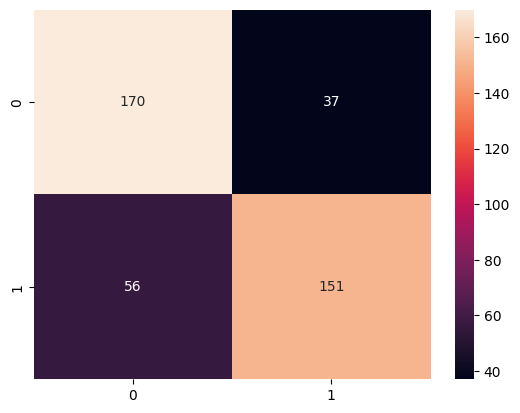

In [47]:
cr = classification_report(y_test, cnn_pred)
cm = confusion_matrix(y_test, cnn_pred)

print(cr)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

#0 is cat, 1 is rabbit

Based on the classification report, the CNN model with the specified conditions fed in with (50x50x3) images did a decent job at classifying cats and rabbits.
- Cat precision (75%) Rabbit precision (80%):

Out of all the instances predicted as cats, 75% were actually cats.

Out of all the instances predicted as rabbit, 80% were actually rabbits.

- Cat recall (82%) Rabbit recall (73%):

Out of all the actual cats, the model predicted 82% of them.

Out of all the actual rabbits, the model predicted 73% of them.

- Overall accuracy (78%)

With better processing capabilities, the model can be further improved by fitting it with the original (300x300x3) images and increasing the number of neurons for training.